# Importing the Necessary Libraries

In [86]:
# import necessary libraries and specify that graphs should be plotted inline.
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the **Dataset**




In [87]:
df=pd.read_excel("Airline.xlsx")
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [88]:
df.shape, df.columns  #checking the shape and the columns of the dataset

((10683, 11),
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info', 'Price'],
       dtype='object'))

# Basic Preprocessing and Data Cleaning

<font size = "+2">Checking for null values and random characters in the dataset</font>

In [89]:
#checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [90]:
#count the No info values in Additional_Info
search =["No info"]

for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

No info in Airline =  0
No info in Date_of_Journey =  0
No info in Source =  0
No info in Destination =  0
No info in Route =  0
No info in Dep_Time =  0
No info in Arrival_Time =  0
No info in Duration =  0
No info in Total_Stops =  0
No info in Additional_Info =  8345
No info in Price =  0


<font size = "+2">Dropping the columns that are not needed,rows with null values and duplicates</font>

In [91]:
#dropping Route(redundant as no of stops is included) and additional info(approx 80% data no info)
airline = df.drop(labels=["Route", "Additional_Info"], axis=1)

In [92]:
# Drop rows with null values in a particular column
airline.dropna(subset=['Total_Stops'], inplace=True)  #can also use airline.dropna()

In [93]:
# drop duplicates if any
airline.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [94]:
airline.shape, airline.isnull().sum()

((10682, 9),
 Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        0
 Price              0
 dtype: int64)

<font size = "+2">Data Cleaning</font>

In [95]:
airline['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [96]:
airline['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [97]:
airline['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [98]:
#changing Total_Stops to max 2+ stops
airline['Total_Stops'] = airline['Total_Stops'].replace({'3 stops':'2+ stops', '4 stops':'2+ stops'})

In [99]:
airline['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
2+ stops      46
Name: Total_Stops, dtype: int64

In [100]:
airline['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [101]:
airline['Airline'] = airline['Airline'].replace({'Multiple carriers Premium economy':'Multiple carriers',
                                                   'Jet Airways Business' : 'Jet Airways', 'Vistara Premium economy':'Vistara' })

In [102]:
airline['Airline'].value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [103]:
airline['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [104]:
airline['Source'] = airline['Source'].replace({'Delhi': 'New Delhi', 'Banglore' : 'Bangalore'})
airline['Source'].value_counts()

New Delhi    4536
Kolkata      2871
Bangalore    2197
Mumbai        697
Chennai       381
Name: Source, dtype: int64

In [105]:
airline['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [106]:
airline['Destination'] = airline['Destination'].replace({'Delhi': 'New Delhi', 'Banglore' : 'Bangalore'})
airline['Destination'].value_counts()

Cochin       4536
Bangalore    2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [107]:
airline['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

## **Feature Engineering**
<font size = "+2">Creating New columns "Day", "Date","Month", "Year" from Column 'Date_of_Journey'
Changing the format of Date_of_Journey, Dep_Time, Arrival_Time, Duration,Total_Stops</font>

In [108]:
# Add 7 days to the date column
from datetime import datetime, timedelta

# Convert the date column to datetime format
airline['Date_of_Journey'] = pd.to_datetime(airline['Date_of_Journey'])

# Add a new column with the day of the week
airline['Day'] = airline['Date_of_Journey'].dt.strftime('%A')
airline.head(10)


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,7h 25m,2 stops,7662,Saturday
2,Jet Airways,2019-09-06,New Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,Friday
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,5h 25m,1 stop,6218,Thursday
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,2h 25m,non-stop,3873,Monday
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,Tuesday
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,Thursday
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,Tuesday
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,Monday


In [109]:
# Extract day, month, and year into separate columns
airline['Date'] = airline['Date_of_Journey'].dt.day
airline['Month'] = airline['Date_of_Journey'].dt.strftime('%B')
airline['Year'] = airline['Date_of_Journey'].dt.year
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month,Year
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday,24,March,2019
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,7h 25m,2 stops,7662,Saturday,5,January,2019
2,Jet Airways,2019-09-06,New Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,Friday,6,September,2019
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,5h 25m,1 stop,6218,Thursday,5,December,2019
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday,3,January,2019
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,2h 25m,non-stop,3873,Monday,24,June,2019
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,Tuesday,3,December,2019
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,Thursday,3,January,2019
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,Tuesday,3,December,2019
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,Monday,27,May,2019


<font size = "+2">Converting the values in Duration column to minutes</font>

In [110]:
airline['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

In [111]:
airline = airline[airline['Duration'].str.match(r'\d+h \d+m')]
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month,Year
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday,24,March,2019
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,7h 25m,2 stops,7662,Saturday,5,January,2019
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,5h 25m,1 stop,6218,Thursday,5,December,2019
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday,3,January,2019
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,2h 25m,non-stop,3873,Monday,24,June,2019
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,Tuesday,3,December,2019
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,Thursday,3,January,2019
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,Tuesday,3,December,2019
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,Monday,27,May,2019
10,Air India,2019-01-06,New Delhi,Cochin,09:45,23:00,13h 15m,1 stop,8907,Sunday,6,January,2019


In [112]:
# Extract hours and minutes using regular expressions
airline[['hours', 'minutes']] = airline['Duration'].str.extract(r'(\d+)h (\d+)m')
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month,Year,hours,minutes
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday,24,March,2019,2,50
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,7h 25m,2 stops,7662,Saturday,5,January,2019,7,25
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,5h 25m,1 stop,6218,Thursday,5,December,2019,5,25
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday,3,January,2019,4,45
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,2h 25m,non-stop,3873,Monday,24,June,2019,2,25
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,Tuesday,3,December,2019,15,30
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,Thursday,3,January,2019,21,5
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,Tuesday,3,December,2019,25,30
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,Monday,27,May,2019,7,50
10,Air India,2019-01-06,New Delhi,Cochin,09:45,23:00,13h 15m,1 stop,8907,Sunday,6,January,2019,13,15


In [113]:
# Convert hours and minutes to integers and calculate the total duration in minutes
airline['hours'] = airline['hours'].astype(int)
airline['minutes'] = airline['minutes'].astype(int)
airline['Duration(mins)'] = airline['hours'] * 60 + airline['minutes']
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Date,Month,Year,hours,minutes,Duration(mins)
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday,24,March,2019,2,50,170
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,7h 25m,2 stops,7662,Saturday,5,January,2019,7,25,445
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,5h 25m,1 stop,6218,Thursday,5,December,2019,5,25,325
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday,3,January,2019,4,45,285
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,2h 25m,non-stop,3873,Monday,24,June,2019,2,25,145
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087,Tuesday,3,December,2019,15,30,930
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,Thursday,3,January,2019,21,5,1265
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087,Tuesday,3,December,2019,25,30,1530
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625,Monday,27,May,2019,7,50,470
10,Air India,2019-01-06,New Delhi,Cochin,09:45,23:00,13h 15m,1 stop,8907,Sunday,6,January,2019,13,15,795


In [114]:
# Drop the original duration, hours, and minutes columns
airline = airline.drop(['Duration','hours', 'minutes'], axis=1)
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Date,Month,Year,Duration(mins)
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,Sunday,24,March,2019,170
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,13:15,2 stops,7662,Saturday,5,January,2019,445
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,23:30,1 stop,6218,Thursday,5,December,2019,325
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,21:35,1 stop,13302,Thursday,3,January,2019,285
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,11:25,non-stop,3873,Monday,24,June,2019,145
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,10:25 13 Mar,1 stop,11087,Tuesday,3,December,2019,930
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,05:05 02 Mar,1 stop,22270,Thursday,3,January,2019,1265
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,10:25 13 Mar,1 stop,11087,Tuesday,3,December,2019,1530
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,19:15,1 stop,8625,Monday,27,May,2019,470
10,Air India,2019-01-06,New Delhi,Cochin,09:45,23:00,1 stop,8907,Sunday,6,January,2019,795


<font size= "+2">Converting Arrival_Time into date and time seperately</font>

In [115]:
airline['Arrival_Time'] = pd.to_datetime(airline['Arrival_Time'])  # convert to datetime type

# Extract date and time components
airline['Arrival Date'] = airline['Arrival_Time'].dt.date
airline['Arrival Time'] = airline['Arrival_Time'].dt.time

In [116]:
airline.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Date,Month,Year,Duration(mins),Arrival Date,Arrival Time
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,2023-03-22 01:10:00,non-stop,3897,Sunday,24,March,2019,170,2023-03-22,01:10:00
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,2023-11-30 13:15:00,2 stops,7662,Saturday,5,January,2019,445,2023-11-30,13:15:00
3,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,2023-11-30 23:30:00,1 stop,6218,Thursday,5,December,2019,325,2023-11-30,23:30:00
4,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,2023-11-30 21:35:00,1 stop,13302,Thursday,3,January,2019,285,2023-11-30,21:35:00
5,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,2023-11-30 11:25:00,non-stop,3873,Monday,24,June,2019,145,2023-11-30,11:25:00
6,Jet Airways,2019-12-03,Bangalore,New Delhi,18:55,2023-03-13 10:25:00,1 stop,11087,Tuesday,3,December,2019,930,2023-03-13,10:25:00
7,Jet Airways,2019-01-03,Bangalore,New Delhi,08:00,2023-03-02 05:05:00,1 stop,22270,Thursday,3,January,2019,1265,2023-03-02,05:05:00
8,Jet Airways,2019-12-03,Bangalore,New Delhi,08:55,2023-03-13 10:25:00,1 stop,11087,Tuesday,3,December,2019,1530,2023-03-13,10:25:00
9,Multiple carriers,2019-05-27,New Delhi,Cochin,11:25,2023-11-30 19:15:00,1 stop,8625,Monday,27,May,2019,470,2023-11-30,19:15:00
10,Air India,2019-01-06,New Delhi,Cochin,09:45,2023-11-30 23:00:00,1 stop,8907,Sunday,6,January,2019,795,2023-11-30,23:00:00


<font size = "+2">Getting the basic summary and statistical information of the data</font>

In [117]:
airline.describe()

,Price,Date,Year,Duration(mins)
count,9650.000000,9650.000000,9650.0,9650.000000
mean,8998.739585,12.621969,2019.0,638.598964
std,4660.582232,8.796834,0.0,508.888983
min,1759.000000,3.000000,2019.0,75.000000
25%,5180.750000,5.000000,2019.0,170.000000
50%,8366.000000,6.000000,2019.0,510.000000
75%,12284.000000,21.000000,2019.0,933.750000
max,79512.000000,27.000000,2019.0,2860.000000


In [118]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9650 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          9650 non-null   object        
 1   Date_of_Journey  9650 non-null   datetime64[ns]
 2   Source           9650 non-null   object        
 3   Destination      9650 non-null   object        
 4   Dep_Time         9650 non-null   object        
 5   Arrival_Time     9650 non-null   datetime64[ns]
 6   Total_Stops      9650 non-null   object        
 7   Price            9650 non-null   int64         
 8   Day              9650 non-null   object        
 9   Date             9650 non-null   int64         
 10  Month            9650 non-null   object        
 11  Year             9650 non-null   int64         
 12  Duration(mins)   9650 non-null   int32         
 13  Arrival Date     9650 non-null   object        
 14  Arrival Time     9650 non-null   object

In [119]:
airline.nunique()  #the number of unique values in each column

Airline               9
Date_of_Journey      40
Source                5
Destination           5
Dep_Time            214
Arrival_Time       1297
Total_Stops           4
Price              1778
Day                   7
Date                  9
Month                 7
Year                  1
Duration(mins)      338
Arrival Date         55
Arrival Time        220
dtype: int64

## **Analyzing the Target Variable**

Text(0, 0.5, 'Frequency')

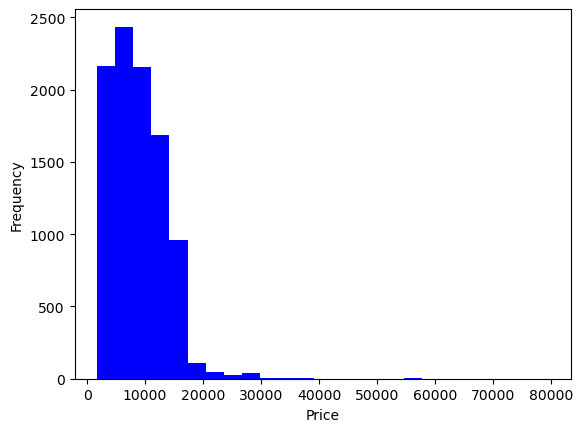

In [120]:
x = airline['Price']
plt.hist(x, bins = 25, color = 'b')
plt.xlabel('Price')
plt.ylabel('Frequency')

<Axes: xlabel='Price', ylabel='Density'>

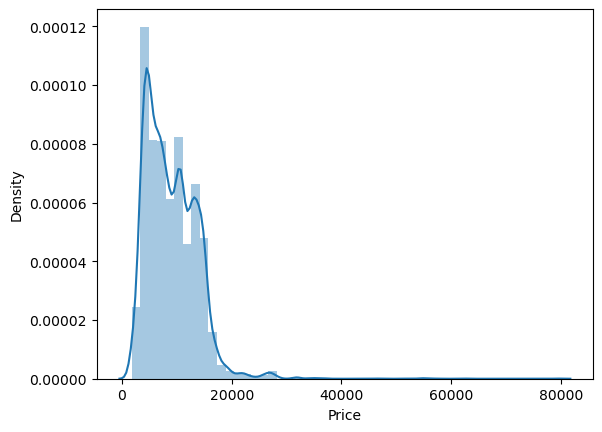

In [121]:
sns.distplot(airline.Price)

In [122]:
airline.Price.skew()

1.8567641007386164

From the graph above it is observed that the Price data forms a continuous distribution with mean of 8998.73 and is skewed to the right.

# **Analyzing the Feature Columns**

# Exploratory Data Analysis(EDA) and Data Cleaning

In [123]:
airline.dtypes[airline.dtypes == 'object'] #Identifying the Categorical Columns

Airline         object
Source          object
Destination     object
Dep_Time        object
Total_Stops     object
Day             object
Month           object
Arrival Date    object
Arrival Time    object
dtype: object

In [124]:
airline['Airline'].value_counts()

Jet Airways          3372
IndiGo               1932
Air India            1628
Multiple carriers     956
SpiceJet              813
Vistara               465
Air Asia              306
GoAir                 177
Trujet                  1
Name: Airline, dtype: int64

Jet Airways has the highest number of flights followed by IndiGo and Air India

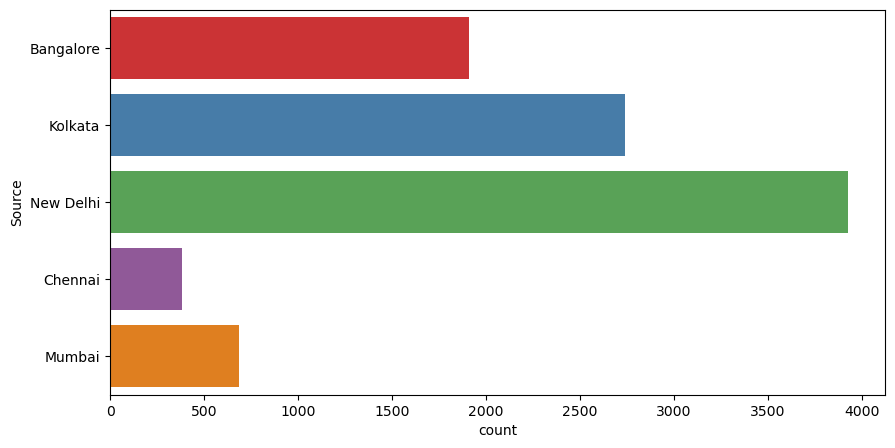

In [125]:
plt.figure(figsize=(10,5),facecolor='white')
ay = sns.countplot(y = airline['Source'], palette="Set1")

Highest number of flights are from New Delhi followed by Kolkata,Bangalore,Mumbai and Chennai

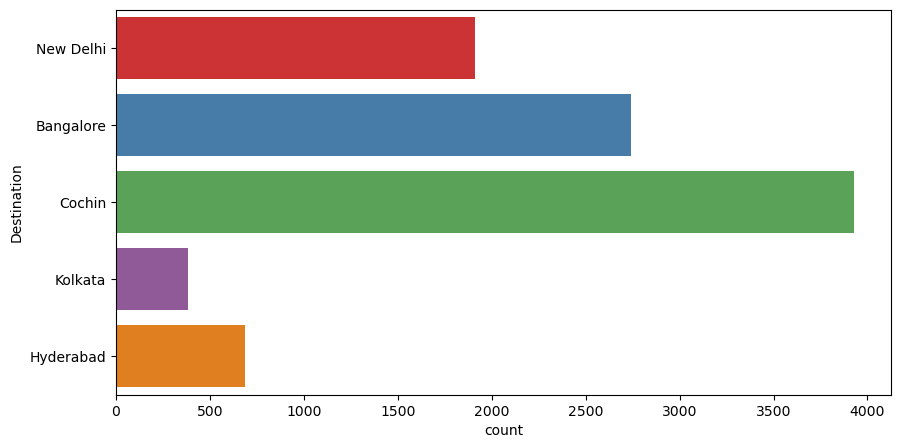

In [126]:
plt.figure(figsize=(10,5),facecolor='white')
ar = sns.countplot(y = airline['Destination'], palette="Set1")

Cochin is the most popular destination followed by Bangalore, New Delhi,Hyderabad and Kolkata.

<font size = "+2">Interpreting Relationship between Independent and Dependent Variables</font>

<font size = "+1">Analyzing Relationship between Day, Month columns and Price</font>

Text(0, 0.5, 'Price (INR)')

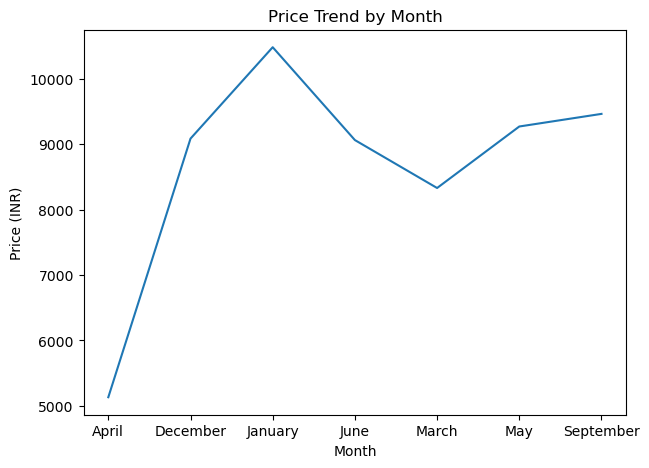

In [127]:
# Price trend by month
plt.figure(figsize=(7,5))
airline.groupby(['Month']).mean()['Price'].plot()
plt.title('Price Trend by Month')
plt.xlabel('Month')
plt.ylabel('Price (INR)')

Text(0, 0.5, 'Price (INR)')

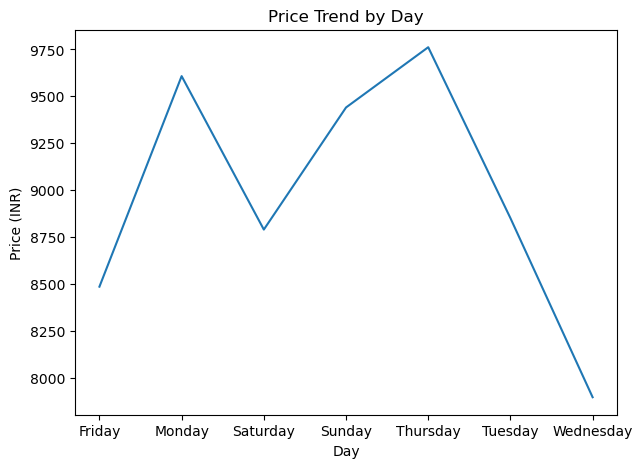

In [128]:
# Price trend by day
plt.figure(figsize=(7,5))
airline.groupby(['Day']).mean()['Price'].plot()
plt.title('Price Trend by Day')
plt.xlabel('Day')
plt.ylabel('Price (INR)')

<Axes: xlabel='Day', ylabel='Price'>

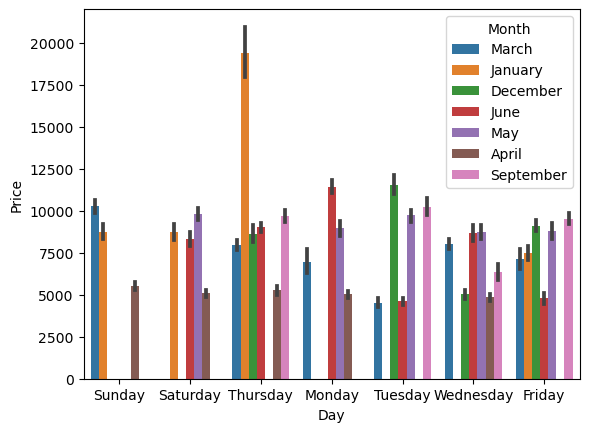

In [129]:
#price trend(bar plot) by day and month together
sns.barplot(x='Day', y='Price', hue='Month', data=airline)

From the above graph it can be observed that on an average, the flight prices are the highest for January, with the prices being lowest for April.

Flight Ticket prices are the highest on Thursdays followed by Mondays and Sundays.

<font size = "+2">Analyzing Relationship between Airlines and Price</font>

Text(0.5, 1.0, 'Price Trend')

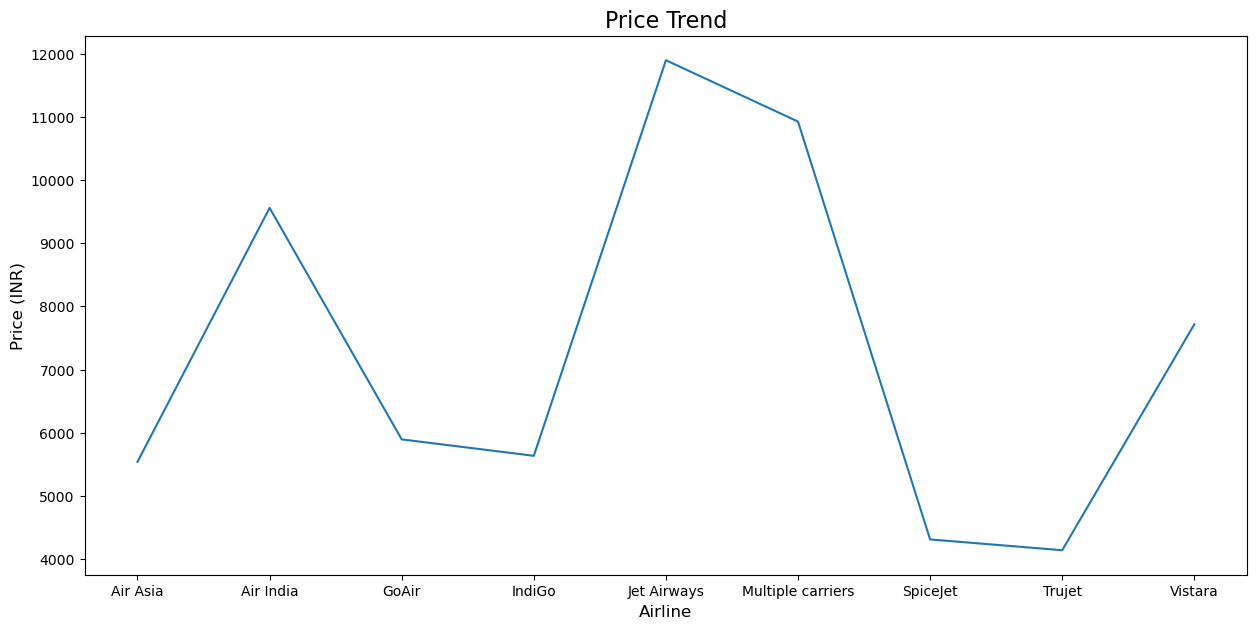

In [130]:
#Airlines vs Price
fig, ax = plt.subplots(figsize=(15,7))
airline.groupby(['Airline']).mean()['Price'].plot(ax=ax)
ax.set_xlabel('Airline', fontsize=12)
ax.set_ylabel('Price (INR)', fontsize=12)
plt.title('Price Trend', fontsize = 16)

Trujet,SpiceJet,IndiGo and Air Asia offer air tickets at the most affordable prices on average, whereas Jet Airways,Multiple carriers,Air India and Vistara are the most expensive on average.

Text(0.5, 1.0, 'Average Price Trend by Flight Duration')

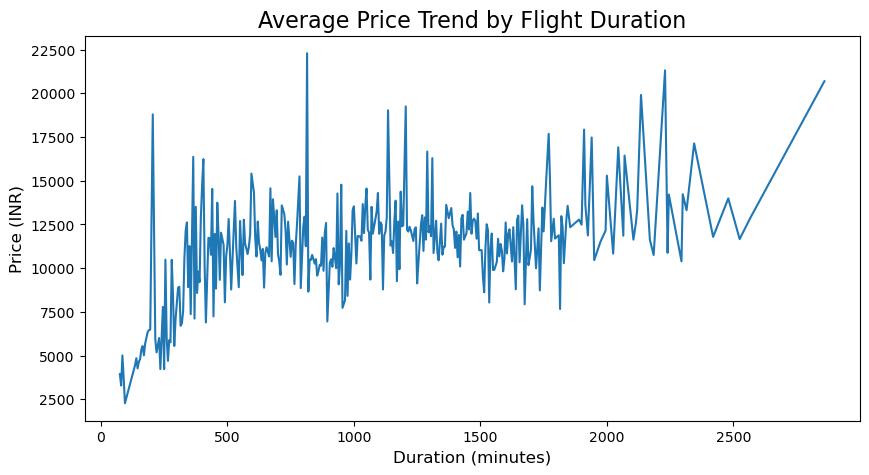

In [131]:
#Price vs Duration(mins)
# Plot average price trend for each duration in minutes
plt.figure(figsize=(10, 5))
ax = airline.groupby('Duration(mins)')['Price'].mean().plot()

# Set axis labels and title
ax.set_xlabel('Duration (minutes)', fontsize=12)
ax.set_ylabel('Price (INR)', fontsize=12)
ax.set_title('Average Price Trend by Flight Duration', fontsize=16)



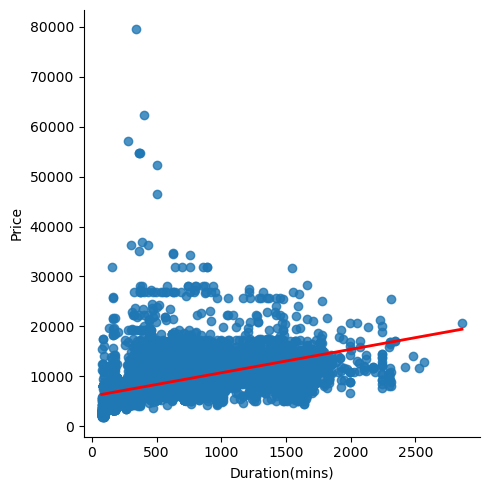

In [132]:
#Price vs Duration(mins) scatterplot and linear regression line
sns.lmplot(x="Duration(mins)", y="Price", data=airline, line_kws={'color': 'red', 'linewidth': 2})

There is a linear relationship between Price and flight duration but not a very strong one.

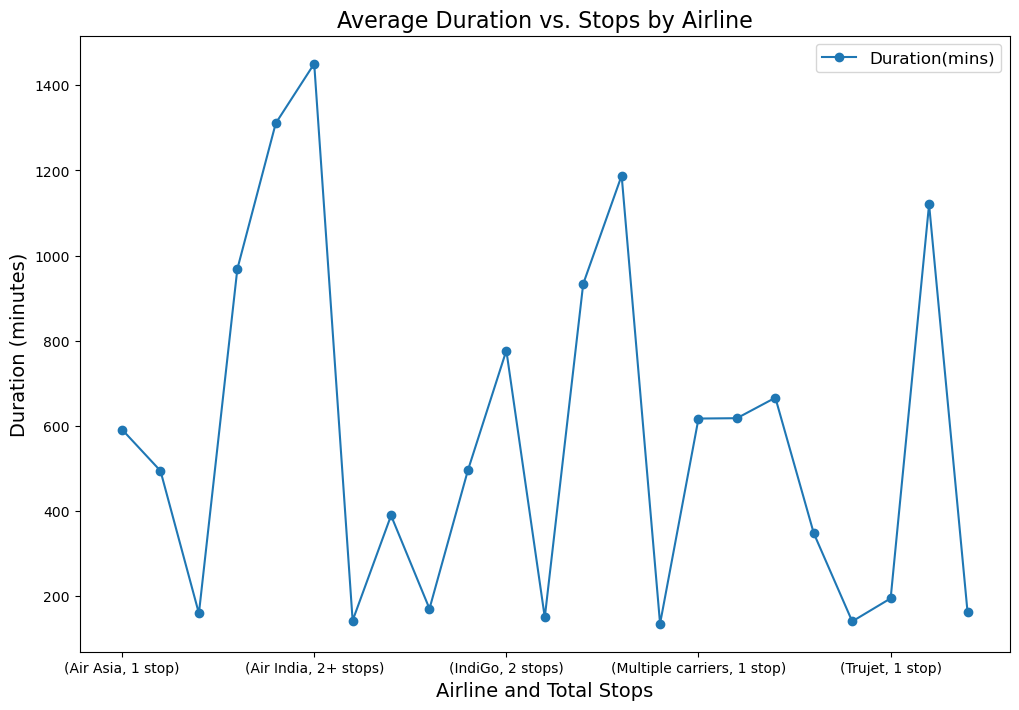

In [133]:
# Plot average duration for different airline and stop combinations
plt.figure(figsize=(12, 8))
ax = airline.groupby(['Airline', 'Total_Stops'])['Duration(mins)'].mean().plot(marker='o')

# Set axis labels and title
ax.set_xlabel('Airline and Total Stops', fontsize=14)
ax.set_ylabel('Duration (minutes)', fontsize=14)
ax.set_title('Average Duration vs. Stops by Airline', fontsize=16)


# Add legend
plt.legend(fontsize=12)

It can be observed that Number of Stops impact the travel time of Airlines

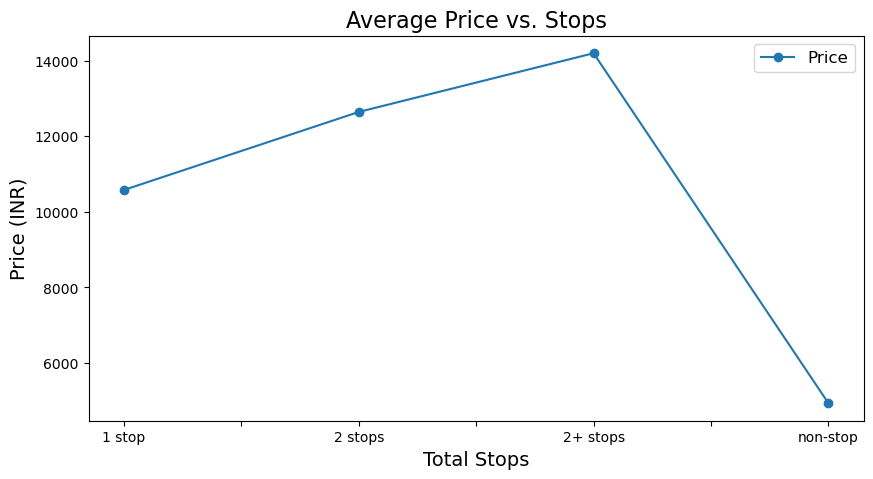

In [134]:
#Total Stops vs Price
# Plot average price for different stop counts
plt.figure(figsize=(10, 5))
ax = airline.groupby(['Total_Stops'])['Price'].mean().plot(marker='o')

# Set axis labels and title
ax.set_xlabel('Total Stops', fontsize=14)
ax.set_ylabel('Price (INR)', fontsize=14)
ax.set_title('Average Price vs. Stops', fontsize=16)

# Add legend
plt.legend(fontsize=12)


It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines. Greater the number of stops, higher the price.

Text(0.5, 1.0, 'Destination(by Airline) vs Price')

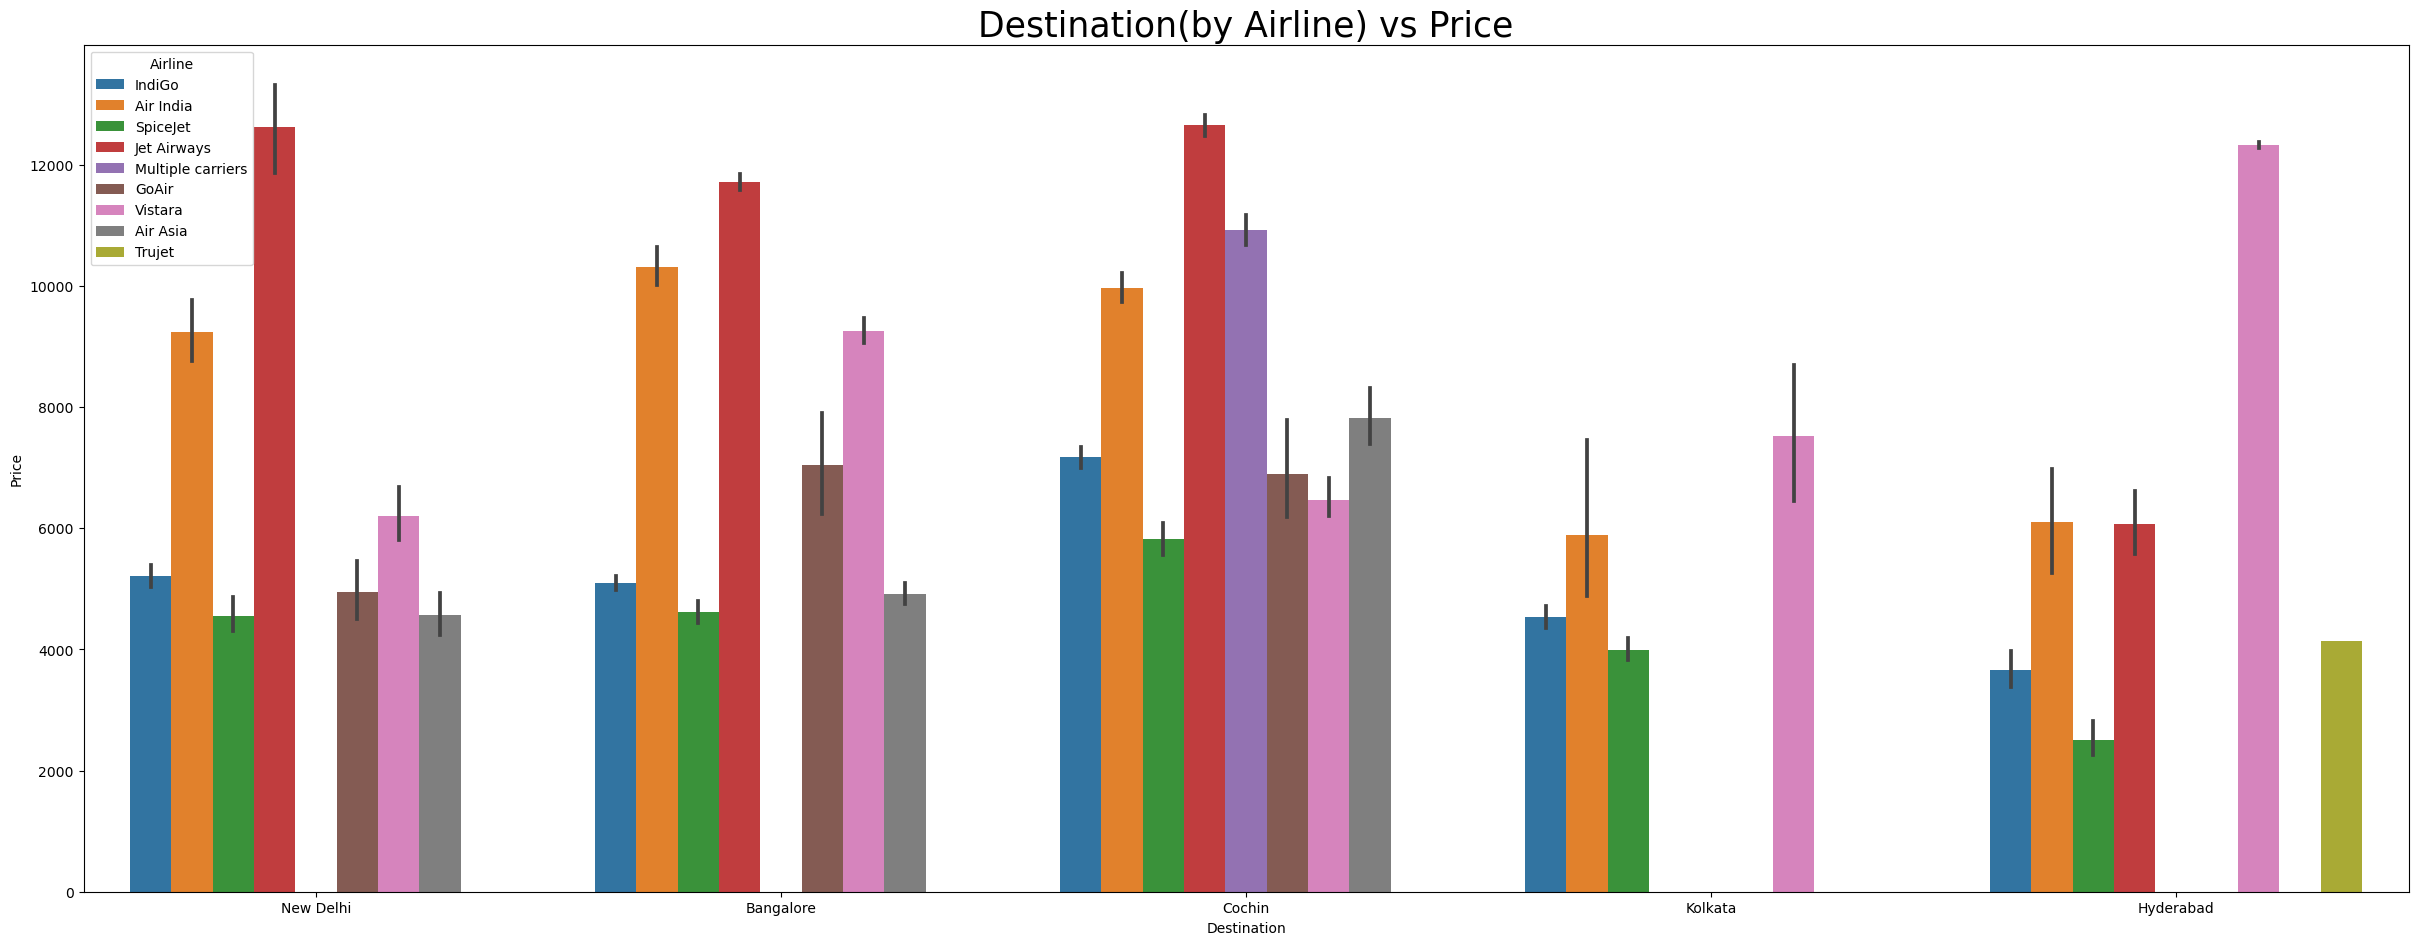

In [135]:
#Destination(by Airline) vs Price
plt.figure(figsize=(30,11), facecolor='white')
sns.barplot(x="Destination", y="Price", hue="Airline", data=airline)
plt.title('Destination(by Airline) vs Price', fontsize = 25)

Cochin and Bangalore are the most expensive destinations and Kolkata and Hyderabad are the most affordable.

Air Asia and Indigo provide most affordable Airtickets to the destinations

<font size = "+2">Checking for Outliers in continuous data type Features</font>

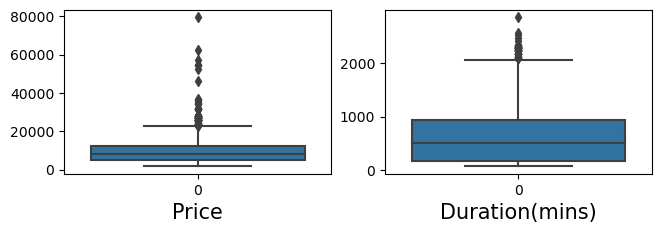

In [136]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in airline[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(airline[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

<font size = "+2">Removing Outliers in Duration(mins) using Z score Method</font>

Using Z score method to reduce outliers since it has a low data loss %

In [137]:
df2 =airline[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [138]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [139]:
df3.shape

(9598, 1)

In [140]:
df2.shape

(9650, 1)

Calculation of Data Loss % :

In [141]:
loss=(9650-9598)/9650 * 100
loss

0.538860103626943

0.5% Data loss is within acceptable range

In [142]:
dropindx = airline.index.difference(df3.index)

This code creates a new pandas Index object called dropindx that contains the index labels of the airline DataFrame that are not present in the df3 DataFrame.

In [143]:
dropindx

Int64Index([  226,   553,   966,   969,  1113,  1346,  1442,  1496,  1551,
             1657,  1791,  1804,  2553,  2641,  2654,  3457,  3790,  3966,
             4047,  5516,  5701,  5711,  5782,  5933,  5953,  6059,  6085,
             6321,  6476,  7189,  7232,  7306,  7329,  7553,  7611,  7612,
             7906,  8127,  8360,  8409,  8412,  8621,  8698,  9247,  9396,
             9551,  9673,  9703,  9848, 10020, 10326, 10456],
           dtype='int64')

In [144]:
airline.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [145]:
airline.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

<Axes: >

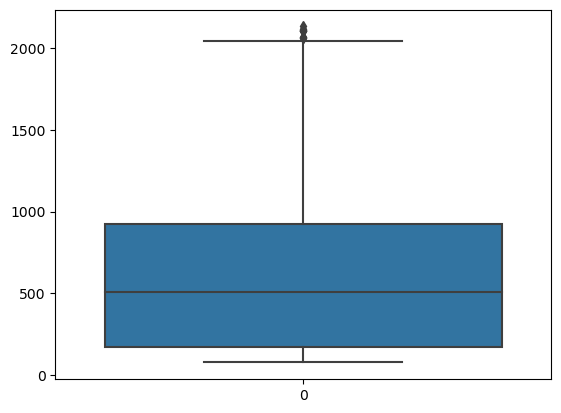

In [146]:
sns.boxplot(airline['Duration(mins)'])

A lot of outliers have been removed.

<font size = "+2">Checking for skewness in data distributions</font>

In [147]:
airline['Duration(mins)'].skew()

0.7758732233316981

The Duration(mins) indicate a right-skewed distribution (tail on the right side).

<font size = "+2">Normalizing Data Distribution using PowerTransformer</font>

In [148]:
from sklearn.preprocessing import PowerTransformer

powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [149]:
df4 = airline[['Duration(mins)']]

In [150]:
transformed= powtrans.fit_transform(df4)
type(transformed)

numpy.ndarray

In [151]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [152]:
transformed.skew()

Duration(mins)   -0.047061
dtype: float64

In [153]:
transformed.index = airline.index

In [154]:
airline[['Duration(mins)']] = transformed[['Duration(mins)']]

In [155]:
airline['Duration(mins)'].skew()

-0.047061147358662854

Majority of the skewness has been removed.

<font size = "+2">Encodoing Categorical Columns using get_dummies()</font>

In [156]:
dummy = pd.get_dummies(airline[['Airline','Total_Stops','Day','Month']],drop_first = False)
dummy

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Total_Stops_1 stop,...,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_January,Month_June,Month_March,Month_May,Month_September
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9594,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9595,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9596,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [157]:
airline=airline.join(dummy)
airline

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Date,...,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_January,Month_June,Month_March,Month_May,Month_September
0,IndiGo,2019-03-24,Bangalore,New Delhi,22:20,2023-03-22 01:10:00,non-stop,3897,Sunday,24,...,0,0,0,0,0,0,0,1,0,0
1,Air India,2019-01-05,Kolkata,Bangalore,05:50,2023-11-30 13:15:00,2 stops,7662,Saturday,5,...,0,0,0,0,0,1,0,0,0,0
2,IndiGo,2019-12-05,Kolkata,Bangalore,18:05,2023-11-30 23:30:00,1 stop,6218,Thursday,5,...,1,0,0,0,1,0,0,0,0,0
3,IndiGo,2019-01-03,Bangalore,New Delhi,16:50,2023-11-30 21:35:00,1 stop,13302,Thursday,3,...,1,0,0,0,0,1,0,0,0,0
4,SpiceJet,2019-06-24,Kolkata,Bangalore,09:00,2023-11-30 11:25:00,non-stop,3873,Monday,24,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,SpiceJet,2019-05-21,Bangalore,New Delhi,05:55,2023-11-30 08:35:00,non-stop,3257,Tuesday,21,...,0,1,0,0,0,0,0,0,1,0
9594,Air Asia,2019-09-04,Kolkata,Bangalore,19:55,2023-11-30 22:25:00,non-stop,4107,Wednesday,4,...,0,0,1,0,0,0,0,0,0,1
9595,Air India,2019-04-27,Kolkata,Bangalore,20:45,2023-11-30 23:20:00,non-stop,4145,Saturday,27,...,0,0,0,1,0,0,0,0,0,0
9596,Vistara,2019-01-03,Bangalore,New Delhi,11:30,2023-11-30 14:10:00,non-stop,12648,Thursday,3,...,1,0,0,0,0,1,0,0,0,0


In [158]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    9598 non-null   object        
 1   Date_of_Journey            9598 non-null   datetime64[ns]
 2   Source                     9598 non-null   object        
 3   Destination                9598 non-null   object        
 4   Dep_Time                   9598 non-null   object        
 5   Arrival_Time               9598 non-null   datetime64[ns]
 6   Total_Stops                9598 non-null   object        
 7   Price                      9598 non-null   int64         
 8   Day                        9598 non-null   object        
 9   Date                       9598 non-null   int64         
 10  Month                      9598 non-null   object        
 11  Year                       9598 non-null   int64         
 12  Durati

In [159]:
#Dropping the columns that are no longer required
airline.drop(columns = ['Airline','Total_Stops','Arrival_Time'],inplace=True) 
airline

,Date_of_Journey,Source,Destination,Dep_Time,Price,Day,Date,Month,Year,Duration(mins),...,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_January,Month_June,Month_March,Month_May,Month_September
0,2019-03-24,Bangalore,New Delhi,22:20,3897,Sunday,24,March,2019,-1.031951,...,0,0,0,0,0,0,0,1,0,0
1,2019-01-05,Kolkata,Bangalore,05:50,7662,Saturday,5,January,2019,-0.030654,...,0,0,0,0,0,1,0,0,0,0
2,2019-12-05,Kolkata,Bangalore,18:05,6218,Thursday,5,December,2019,-0.370593,...,1,0,0,0,1,0,0,0,0,0
3,2019-01-03,Bangalore,New Delhi,16:50,13302,Thursday,3,January,2019,-0.508884,...,1,0,0,0,0,1,0,0,0,0
4,2019-06-24,Kolkata,Bangalore,09:00,3873,Monday,24,June,2019,-1.186403,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,2019-05-21,Bangalore,New Delhi,05:55,3257,Tuesday,21,May,2019,-1.091177,...,0,1,0,0,0,0,0,0,1,0
9594,2019-09-04,Kolkata,Bangalore,19:55,4107,Wednesday,4,September,2019,-1.153740,...,0,0,1,0,0,0,0,0,0,1
9595,2019-04-27,Kolkata,Bangalore,20:45,4145,Saturday,27,April,2019,-1.122016,...,0,0,0,1,0,0,0,0,0,0
9596,2019-01-03,Bangalore,New Delhi,11:30,12648,Thursday,3,January,2019,-1.091177,...,1,0,0,0,0,1,0,0,0,0


In [160]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date_of_Journey            9598 non-null   datetime64[ns]
 1   Source                     9598 non-null   object        
 2   Destination                9598 non-null   object        
 3   Dep_Time                   9598 non-null   object        
 4   Price                      9598 non-null   int64         
 5   Day                        9598 non-null   object        
 6   Date                       9598 non-null   int64         
 7   Month                      9598 non-null   object        
 8   Year                       9598 non-null   int64         
 9   Duration(mins)             9598 non-null   float64       
 10  Arrival Date               9598 non-null   object        
 11  Arrival Time               9598 non-null   object        
 12  Airlin

In [161]:
#dropping 'Date_of_Journey' column since it is no longer needed
airline.drop(columns = ['Date_of_Journey'],inplace=True) 

In [162]:
#dropping 'Day' and 'Month' column since it is no longer needed
airline.drop(columns = ['Day','Month'],inplace=True) 

In [163]:
#dropping 'Year' column since it is no longer needed
airline.drop(columns = ['Year'],inplace=True) 

<font size = "+2">Encoding Columns 'Source' and 'Destination' using Label Encoder</font>

In [164]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
for col in airline[['Source','Destination']]:
    airline[col] = label_encoding.fit_transform(airline[col])
    
airline

,Source,Destination,Dep_Time,Price,Date,Duration(mins),Arrival Date,Arrival Time,Airline_Air Asia,Airline_Air India,...,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_January,Month_June,Month_March,Month_May,Month_September
0,0,4,22:20,3897,24,-1.031951,2023-03-22,01:10:00,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,05:50,7662,5,-0.030654,2023-11-30,13:15:00,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0,18:05,6218,5,-0.370593,2023-11-30,23:30:00,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,4,16:50,13302,3,-0.508884,2023-11-30,21:35:00,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2,0,09:00,3873,24,-1.186403,2023-11-30,11:25:00,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,0,4,05:55,3257,21,-1.091177,2023-11-30,08:35:00,0,0,...,0,1,0,0,0,0,0,0,1,0
9594,2,0,19:55,4107,4,-1.153740,2023-11-30,22:25:00,1,0,...,0,0,1,0,0,0,0,0,0,1
9595,2,0,20:45,4145,27,-1.122016,2023-11-30,23:20:00,0,1,...,0,0,0,1,0,0,0,0,0,0
9596,0,4,11:30,12648,3,-1.091177,2023-11-30,14:10:00,0,0,...,1,0,0,0,0,1,0,0,0,0


## Finding Correlation

In [166]:
airline_corr=airline.corr()
airline_corr

,Source,Destination,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_December,Month_January,Month_June,Month_March,Month_May,Month_September
Source,1.000000,-0.636630,0.198941,0.102365,0.362230,-0.062938,0.011847,-0.074421,-0.078706,0.042650,...,0.024027,-0.076387,0.048317,-0.112227,-0.076177,-0.088912,0.090762,-0.039937,0.079321,0.050714
Destination,-0.636630,1.000000,-0.174772,-0.029113,-0.397882,-0.006158,-0.018587,0.092355,0.112985,-0.117763,...,-0.010873,0.092182,-0.058986,0.086738,-0.009097,0.016653,-0.005509,0.146630,-0.146640,-0.055002
Price,0.198941,-0.174772,1.000000,-0.170532,0.603404,-0.134035,0.050951,-0.090798,-0.360527,0.457061,...,0.085502,-0.011064,-0.098042,-0.165672,0.006992,0.107509,0.007031,-0.076916,0.030491,0.039898
Date,0.102365,-0.029113,-0.170532,1.000000,-0.046067,0.013506,-0.035190,0.002156,0.017075,-0.032343,...,-0.057577,-0.042339,0.012079,0.194821,-0.269731,-0.306914,0.022784,0.161444,0.442968,-0.345463
Duration(mins),0.362230,-0.397882,0.603404,-0.046067,1.000000,-0.105548,0.194082,-0.085844,-0.360442,0.362756,...,0.059272,-0.040338,-0.023921,-0.173192,0.037626,0.014244,-0.006400,-0.072794,0.079185,0.057053
Airline_Air Asia,-0.062938,-0.006158,-0.134035,0.013506,-0.105548,1.000000,-0.081014,-0.024874,-0.091101,-0.132971,...,-0.012401,0.006759,0.010899,0.062058,-0.001717,-0.010904,-0.006102,-0.010233,-0.000163,-0.003976
Airline_Air India,0.011847,-0.018587,0.050951,-0.035190,0.194082,-0.081014,1.000000,-0.061192,-0.224116,-0.327118,...,0.001478,0.012000,-0.011783,-0.029987,0.014527,0.017767,-0.017152,0.000901,0.009856,-0.002389
Airline_GoAir,-0.074421,0.092355,-0.090798,0.002156,-0.085844,-0.024874,-0.061192,1.000000,-0.068811,-0.100436,...,-0.022521,-0.005938,0.010239,0.044825,-0.013733,0.004389,-0.002329,0.007558,-0.016066,-0.005249
Airline_IndiGo,-0.078706,0.112985,-0.360527,0.017075,-0.360442,-0.091101,-0.224116,-0.068811,1.000000,-0.367849,...,-0.030431,0.011190,0.029923,0.089397,-0.029575,-0.020051,-0.004603,0.048428,-0.040937,-0.012477
Airline_Jet Airways,0.042650,-0.117763,0.457061,-0.032343,0.362756,-0.132971,-0.327118,-0.100436,-0.367849,1.000000,...,0.044415,-0.009859,-0.046798,-0.110652,0.055497,0.030739,0.002155,-0.059896,0.026746,0.026362


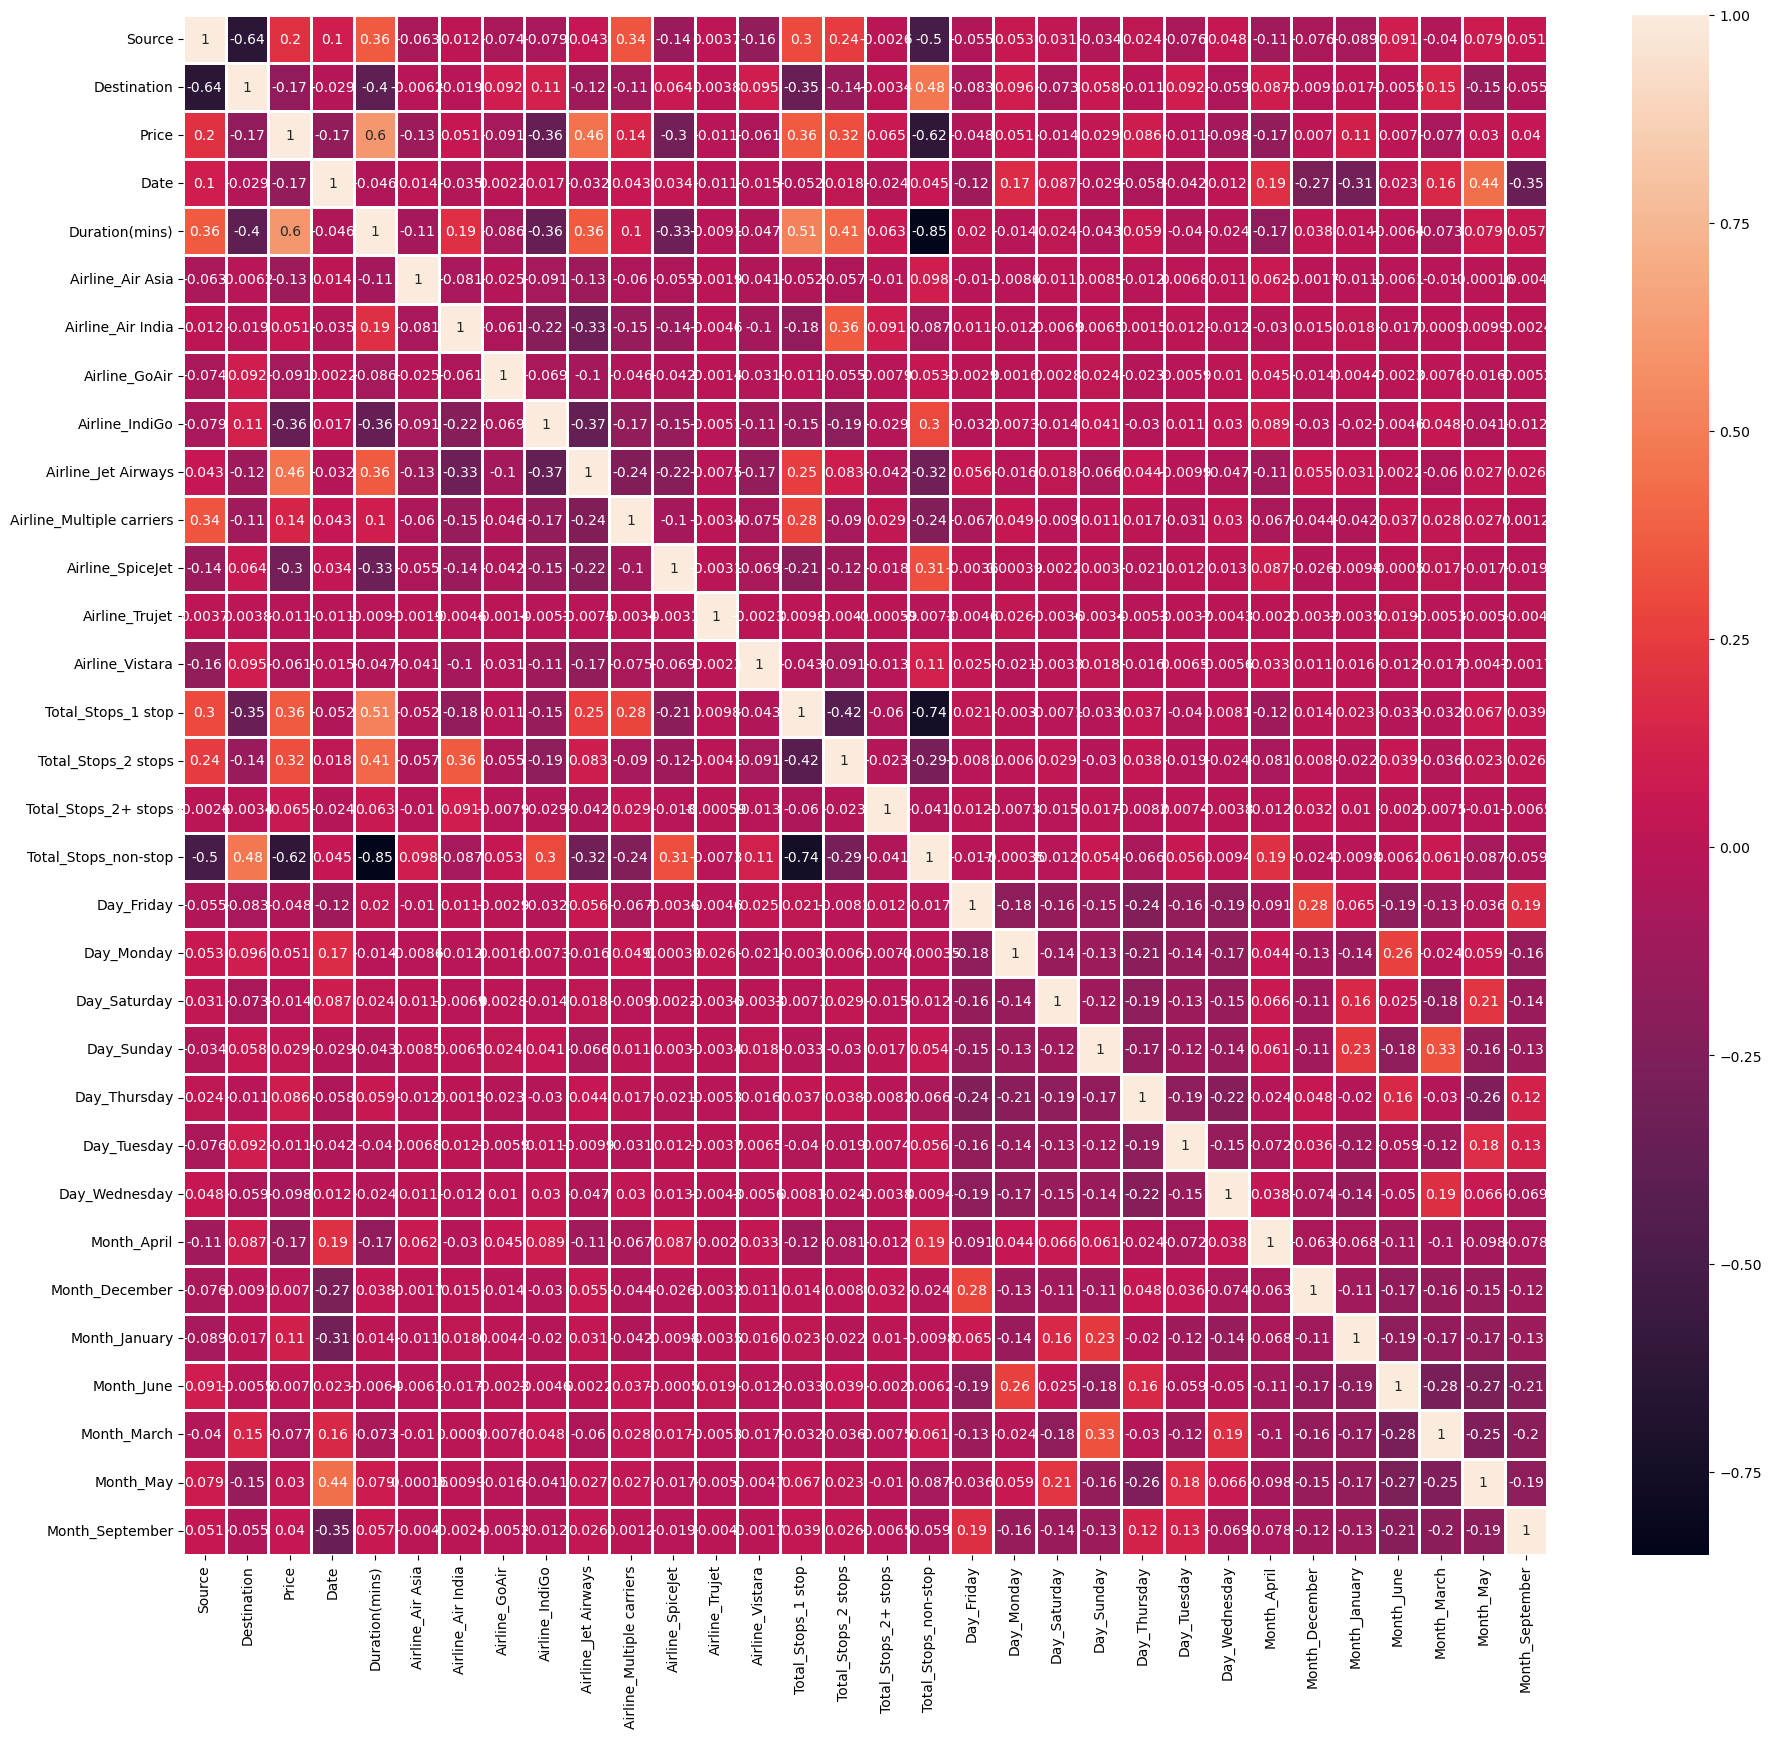

In [167]:
plt.figure(figsize=(22,20))
sns.heatmap(airline_corr,annot=True,linewidth=1)
plt.show()

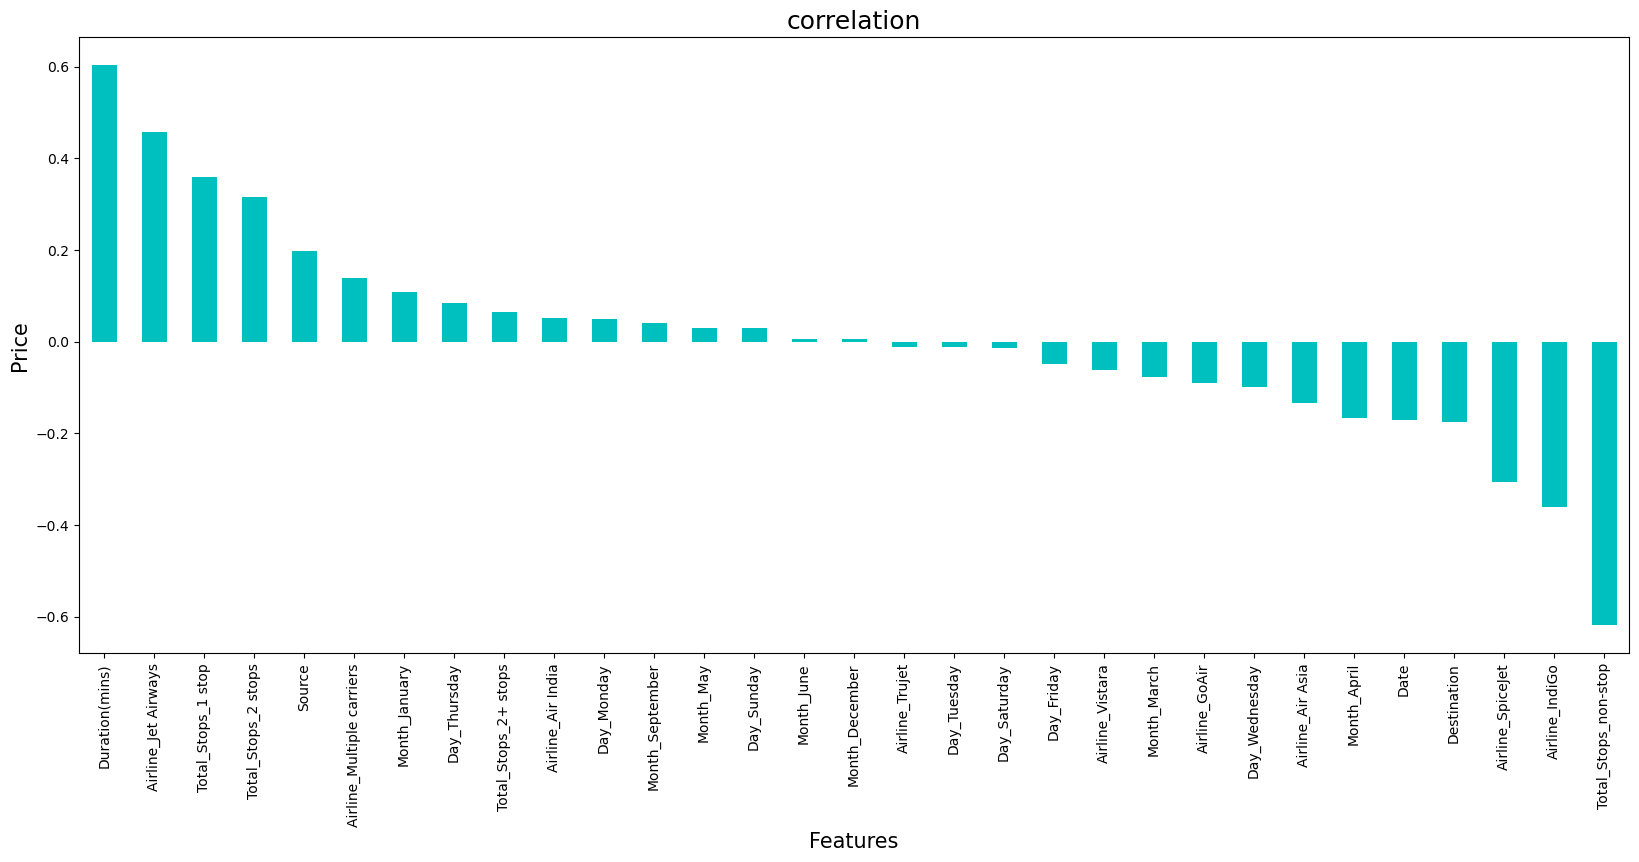

In [168]:
plt.figure(figsize = (20,8))
airline.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Duration(mins), Airline_Jet Airways, Total_Stops_1 stop and Total_Stops_2 stops have the highest positive correlation with Price, while Airline_Spicejet, Airline_IndiGo, Total_Stops_non-stop have the highest negative correlation with Price.

## **Feature Selection**

In [169]:
airline.drop(columns=['Arrival Date','Arrival Time','Dep_Time'],inplace=True)

In [170]:
from sklearn.preprocessing import StandardScaler
X = airline.drop(columns = ['Price'])
y = airline['Price']
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [171]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source                     9598 non-null   int32  
 1   Destination                9598 non-null   int32  
 2   Price                      9598 non-null   int64  
 3   Date                       9598 non-null   int64  
 4   Duration(mins)             9598 non-null   float64
 5   Airline_Air Asia           9598 non-null   uint8  
 6   Airline_Air India          9598 non-null   uint8  
 7   Airline_GoAir              9598 non-null   uint8  
 8   Airline_IndiGo             9598 non-null   uint8  
 9   Airline_Jet Airways        9598 non-null   uint8  
 10  Airline_Multiple carriers  9598 non-null   uint8  
 11  Airline_SpiceJet           9598 non-null   uint8  
 12  Airline_Trujet             9598 non-null   uint8  
 13  Airline_Vistara            9598 non-null   uint8

<font size = "+2">Checking for Multicollinearity using Variance Inflation Factor</font>

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_ifactor = pd.DataFrame()
var_ifactor["Features"] = X.columns
var_ifactor['var_ifactor'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
var_ifactor

,Features,var_ifactor
0,Source,2.359191
1,Destination,2.078519
2,Date,2.047079
3,Duration(mins),4.768508
4,Airline_Air Asia,inf
5,Airline_Air India,inf
6,Airline_GoAir,inf
7,Airline_IndiGo,inf
8,Airline_Jet Airways,inf
9,Airline_Multiple carriers,inf


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped. If the VIF is infinity for most of the fields in the model, it indicates that there is a severe multicollinearity problem between the independent variables.

In such cases, it is recommended to identify and remove the highly correlated independent variables or to use methods that are less sensitive to multicollinearity, such as ridge regression.

<font size = "+2">Selecting Kbest Features</font>

In [173]:
# Initialize SelectKBest object with f_classif score function and k = 'all'
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data and retrieve the feature scores
selector.fit(X, y)
scores = pd.DataFrame(selector.scores_, columns=['Score'])
columns = pd.DataFrame(X.columns, columns=['Feature'])

# Combine feature scores and column names into a single DataFrame
feature_scores = pd.concat([columns, scores], axis=1)

# Rename the columns of the feature_scores DataFrame
feature_scores.columns = ['Feature', 'Score']

# Print the top 30 features with the highest scores
top_features = feature_scores.nlargest(30, 'Score')
print(top_features)

                      Feature       Score
11             Airline_Trujet         inf
8         Airline_Jet Airways  423.044614
12            Airline_Vistara  371.774847
16       Total_Stops_non-stop  367.924831
0                      Source  233.397939
1                 Destination  223.711563
9   Airline_Multiple carriers  206.177178
13         Total_Stops_1 stop  175.722613
5           Airline_Air India  161.784250
14        Total_Stops_2 stops  102.099039
4            Airline_Air Asia   98.175046
7              Airline_IndiGo   48.424759
3              Duration(mins)   39.188051
6               Airline_GoAir   35.583156
10           Airline_SpiceJet   31.980880
15       Total_Stops_2+ stops   13.482802
28                Month_March    6.436662
20                 Day_Sunday    4.258532
2                        Date    3.218184
26              Month_January    2.829983
29                  Month_May    2.806552
18                 Day_Monday    2.759919
22                Day_Tuesday    2

Selecting best features based on their scores:

In [174]:
x_best = X.drop(columns=['Airline_Trujet']).copy()

In [175]:
scaled_x_best = scaler.fit_transform(x_best)

This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.

## **Building Regression Model**

<font size = "+2">Split the data into training and testing sets</font>

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =49)

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [178]:
from sklearn.metrics import r2_score,mean_squared_error

<font size = "+2">Finding the Best Random State</font>

In [179]:
best_acc = 0
best_rs = 0

for rs in range(1, 101):
    # Split data into training and testing sets using the current random state
    x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, test_size=0.25, random_state=rs)
    
    # Initialize and fit the random forest regressor model
    model_rf = XGBRegressor()
    model_rf.fit(x_train, y_train)
    
    # Make predictions on the testing set and compute the accuracy
    y_pred = model_rf.predict(x_test)
    acc = r2_score(y_test, y_pred)
    
    # Update the best accuracy and random state if the current accuracy is higher
    if acc > best_acc:
        best_acc = acc
        best_rs = rs

# Print the best accuracy and corresponding random state
print(f"Best accuracy is: {best_acc} on random state: {best_rs}")

Best accuracy is: 0.8126665554326608 on random state: 49


In [180]:
best_acc = 0
best_rs = 0

for rs in range(1, 101):
    # Split data into training and testing sets using the current random state
    x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, test_size=0.25, random_state=rs)
    
    # Initialize and fit the random forest regressor model
    model_rf = RandomForestRegressor()
    model_rf.fit(x_train, y_train)
    
    # Make predictions on the testing set and compute the accuracy
    y_pred = model_rf.predict(x_test)
    acc = r2_score(y_test, y_pred)
    
    # Update the best accuracy and random state if the current accuracy is higher
    if acc > best_acc:
        best_acc = acc
        best_rs = rs

# Print the best accuracy and corresponding random state
print(f"Best accuracy is: {best_acc} on random state: {best_rs}")

Best accuracy is: 0.7937921661560746 on random state: 76


<font size = "+2">Training the Models</font>

In [181]:
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
xg_reg = XGBRegressor()
SV_reg= SVR()
r_reg=Ridge()

<font size = "+2">Fitting the models</font>

In [182]:
rf_reg.fit(x_train,y_train)
xg_reg.fit(x_train,y_train)
SV_reg.fit(x_train,y_train)
r_reg.fit(x_train,y_train)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

## Random Forest Regression Model

In [183]:
y_rf_pred = rf_reg.predict(x_test)

In [184]:
# finding the r2 score
r2_score(y_test,y_rf_pred)

0.6989333136541902

In [185]:
# finding the mean squared error
mean_squared_error(y_test,y_rf_pred)

6499906.79750254

In [186]:
# finding the root mean squared error
np.sqrt(mean_squared_error(y_test,y_rf_pred))

2549.491478217282

## Ridge Regression Model

In [187]:
y_r_pred = r_reg.predict(x_test)

In [188]:
# finding the r2 score
r2_score(y_test,y_r_pred)

0.5723261315094965

In [189]:
# finding the mean squared error
mean_squared_error(y_test,y_r_pred)

9233304.151501715

In [190]:
# finding the root mean squared error
np.sqrt(mean_squared_error(y_test,y_r_pred))

3038.6352448923044

## **XGB Regression Model**

In [191]:
y_xg_pred = xg_reg.predict(x_test)

In [192]:
# finding the r2 score
r2_score(y_test,y_xg_pred)

0.7244423353280363

In [193]:
# finding the mean squared error
mean_squared_error(y_test,y_xg_pred)

5949177.437878126

In [194]:
# finding the root mean squared error
np.sqrt(mean_squared_error(y_test,y_xg_pred))

2439.093568905901

# Support Vector Regression Model

In [195]:
y_svr_pred = SV_reg.predict(x_test)

In [196]:
# finding the r2 score
r2_score(y_test,y_svr_pred)

0.03227884330165165

In [197]:
# finding the mean squared error
mean_squared_error(y_test,y_svr_pred)

20892704.539504286

In [198]:
# finding the root mean squared error
np.sqrt(mean_squared_error(y_test,y_svr_pred))

4570.853808590282

# Decision Tree Regression Model

In [199]:
y_dt_pred = dt_reg.predict(x_test)

In [200]:
# finding the r2 score
r2_score(y_test,y_dt_pred)

0.5575583433359375

In [201]:
# finding the mean squared error
mean_squared_error(y_test,y_dt_pred)

9552134.666755533

In [202]:
# finding the root mean squared error
np.sqrt(mean_squared_error(y_test,y_dt_pred))

3090.6527897445117

## **Model Cross Validation**

In [203]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

print('Ridge Regression - Cross Validation score: ', cross_val_score(r_reg,scaled_x_best,y,cv=ShuffleSplit(5)).mean())
print('XGB Regression - Cross Validation score:', cross_val_score(xg_reg,scaled_x_best,y,cv=ShuffleSplit(5)).mean())
print('SV Regression - Cross Validation score:',cross_val_score(SV_reg,scaled_x_best,y,cv=ShuffleSplit(5)).mean())
print('Decission Tree Regression - Cross Validation score:',cross_val_score(dt_reg,scaled_x_best,y,cv=ShuffleSplit(5)).mean())
print('Random Forest Regression - Cross Validation score:',cross_val_score(rf_reg,scaled_x_best,y,cv=ShuffleSplit(5)).mean())

Ridge Regression - Cross Validation score:  0.5935591096265346
XGB Regression - Cross Validation score: 0.803596333991446
SV Regression - Cross Validation score: 0.04707517251034763
Decission Tree Regression - Cross Validation score: 0.5993818016457345
Random Forest Regression - Cross Validation score: 0.748092493866781


Based on comparing Cross Validation results, it is determined that XGB Regression is the best model. It also has the lowest Root Mean Squared Error score

## **Hyper Parameter Tuning**

In [212]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [30, 60, 80, 100, 120]
}

# Define the XGBRegressor model
model = XGBRegressor()

# Define the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)



Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30}


In [213]:
Best_model = XGBRegressor( n_estimators = 30, max_depth= 10, learning_rate= 0.1)

Best_model.fit(x_train,y_train)

xgb_pred = Best_model.predict(x_test)
accuracy = r2_score(y_test,xgb_pred)
print(accuracy*100)

74.12403697383559


XGB Regressor has an accuracy of 74%